In [ ]:
x.m , x.m()

# Object oriented programming

## Objectives
* Learn how to use objects
* Learn how to make classes

Objects are everywhere in Python. And you can make your own!

Why?

* You can collect data and actions into one package
* You can change the object behavior to be "natural" for your situation
* You can replace parts of functions
* You can template an interface

#### Collect data and actions

```python
my_data_file = MyDataClass(...)

my_data_file.check_data()
my_data_file.process()
my_data_file.plot()
```

Data and actions usually are related.

#### Change behavior of objects

```python
vector_1 = Vector(...)
vector_2 = Vector(...)
vector_3 = vector_1 + vector_2
print(vector_3)
```

Most of Python's syntax can be controlled by the classes. Math, printing, most built-in functions, indexing, iteration, `with` statements, you name it. It's easier to go over what you can't modify: `and`, `or`, `not`, `is`, and the basic assignment operator.

#### Replacing parts of functions (or data):

```python
def my_long_function():
    # Do something 1
    ...
    # Do something 2
    ...
    # Do something 3
    ...
```

What happens if you only need to replace the middle part? Objects give you a way to make these parts modular without replacing `my_long_function`

#### Template an interface

```python

class MySolution(InstructorTemplate):
    def solution_1(...
```

You can implement a framework that requires a user implement a few parts, while you do the rest. Might be handy for problem sets, for example! Given Python's amazing abilities at inspection, you can do practically anything here.

## Making your own classes

Simplest class ever:

In [1]:
class VerySimpleClass:
    pass

The class block is a lot like a "bag" that holds all definitions made in it. There are only two extras: a little bit of information is injected to make the class easier to use (like the name and the location in the file), and you "inherit" from `object` - which means you get some predefined methods for free.

---

> ## Aside: Python 2:
> 
> If you are stuck in Python 2, never leave the inherit part of a class empty - this will leave you with an "old-style" class, and it will not work as you expect. Put the Python base class `object` there instead.
> 
> ```python
> class VerySimpleClass(object):
>     pass
> ```
> 
> Python 3 removed old style classes so it is safe to do this again.

Slightly more useful:

In [2]:
class MySimpleClass:
    def __init__(self, value):
        self.value = value

In [9]:
v = MySimpleClass(3)
v.value

Any functions (methods) in the class are expected to take the class instance as the first argument - always called `self` by convention.

# Special methods


* `__init__`: Sets up a class when a new one is created - called as part of the "constructor"
* `__repr__`: Controls the "programmer's" display of a class (such as in interactive prompts) - often looks like the constructor.
* `__str__`: Controls the printed form of a class 
* `__add__`: Most math operations are available, like adding (see [Dive into Python 3](http://www.diveintopython3.net/special-method-names.html) and [official docs](https://docs.python.org/3/reference/datamodel.html))

## Case study: imaginary numbers

Let's pretend we don't know imaginary numbers are part of Python, and make our own class (listing 4.1, 4.2, 4.3 in our book):

In [13]:
class Complex:
    def __init__(self, real, imag):
        self.real = real
        self.imag = imag
    def __add__(self, other):
        return self.__class__(self.real + other.real,
                              self.imag + other.imag)
    def __sub__(self, other):
        return self.__class__(self.real - other.real,
                              self.imag - other.imag)
    def __mul__(self, other):
        return self.__class__(self.real*other.real - self.imag*other.imag,
                              self.real*other.imag + self.imag*other.real)
    def __repr__(self):
        return f"{self.real} + {self.imag}j"

In [16]:
Complex(1,2)

1 + 2j

In [17]:
Complex(1,0) + Complex(0,1)

1 + 1j

In [18]:
Complex(1,0) - Complex(0,1)

1 + -1j

We can compare this with the builtin complex numbers:

In [19]:
Complex(1,1) * Complex(1,1)

0 + 2j

In [20]:
complex(1,1) * complex(1,1)

2j

# From the book: Beats

In [22]:
import matplotlib.pyplot as plt
import math

Text(0,0.5,'f(x)')

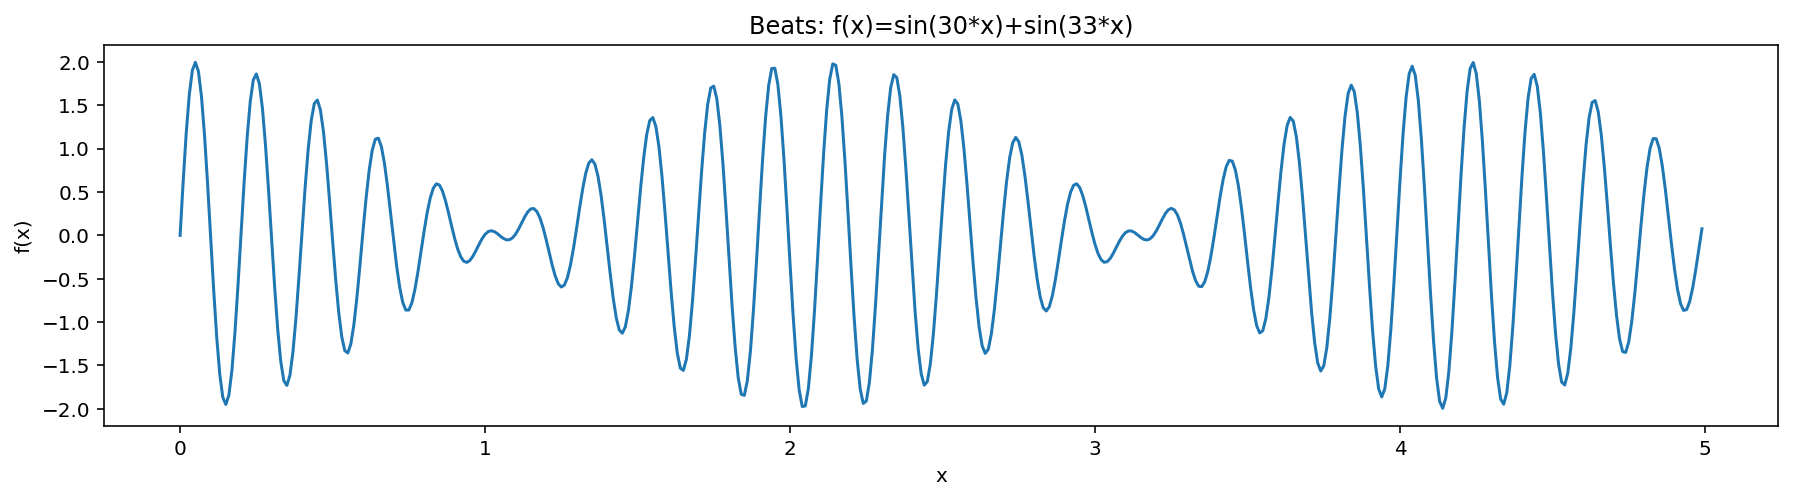

In [25]:
# Using pure python to make a list from 0 to 5 with 500 points
x = [v/100 for v in range(500)]

# Now compute the function, again with a list comprehension
y = [math.sin(30*v) + math.sin(33*v) for v in x]

plt.figure(figsize=(15,3.5))
plt.plot(x,y)
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)')
plt.xlabel('x')
plt.ylabel('f(x)')

* When we go into plotting, we'll see a "better" way to plot
* Later we'll use numpy here instead of Python's lists and math library

---
> Reminder! list comprehensions and looping in Python is **slow**. We will soon see how to do this more cleanly and beautifully in numpy, and it will be faster too.

In [29]:
class Wave:
    def __init__(self, x, coef):
        self.x = x
        self.y = [math.sin(coef*v) for v in x]
    
    def __add__(self, other):
        result = self.__class__(self.x, 0)
        result.y = [a+b for a,b in zip(self.y, other.y)]
        return result

    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel('x')
        plt.ylabel('f(x)')

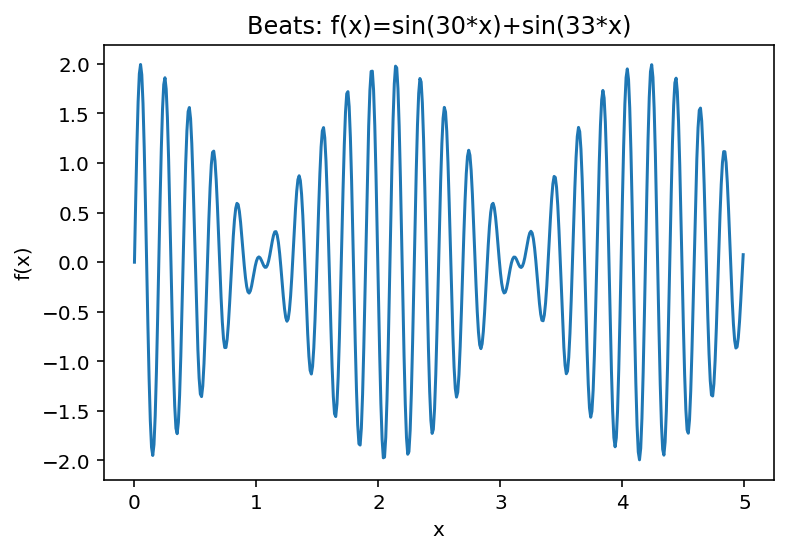

In [33]:
# Using pure python to make a list from 0 to 5 with 500 points
x = [v/100 for v in range(500)]

# Now compute the function
wave = Wave(x, 30) + Wave(x, 33)

plt.figure()
wave.plot()
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)');

### Bonus: Using Numpy notation

In [34]:
import numpy as np

class WaveNP:
    def __init__(self, x, coef):
        self.x = x
        self.y = np.sin(coef*x)
    
    def __add__(self, other):
        result = self.__class__(self.x, 0)
        result.y = self.y + other.y
        return result

    def plot(self):
        plt.plot(self.x, self.y)
        plt.xlabel('x')
        plt.ylabel('f(x)')

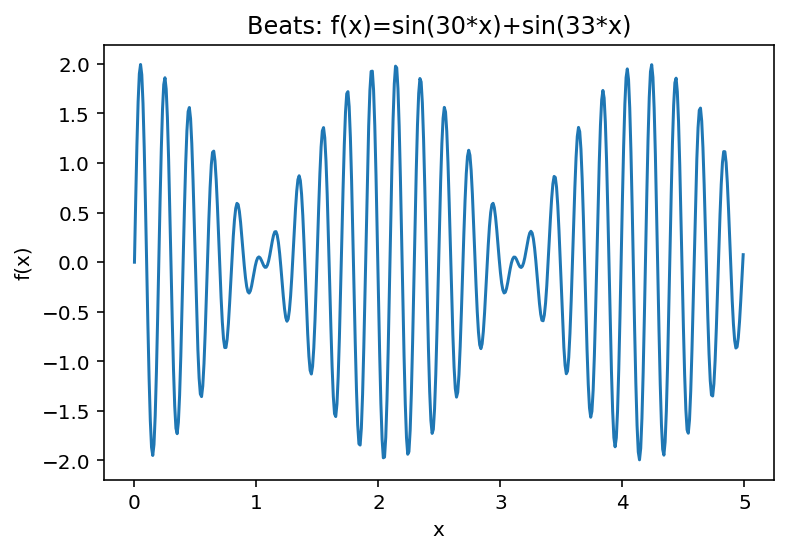

In [36]:
# Using numpy to make an array from 0 to 5 with 500 points
x = np.linspace(0,5,500, endpoint=False)

# Now compute the function
wavenp = WaveNP(x, 30) + WaveNP(x, 33)

plt.figure()
wavenp.plot()
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)');

# Inheritance

We can use inheritance to add or change anything in a class:

In [37]:
class Wave2(WaveNP):
    def plot(self):
        plt.plot(self.x, self.y, '.r')
        plt.xlabel('x')
        plt.ylabel('f(x)');

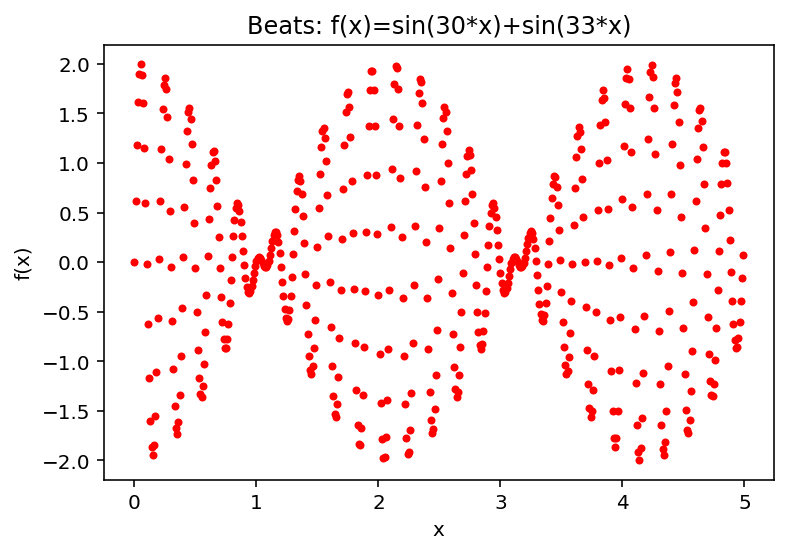

In [38]:
wave2 = Wave2(x, 30) + Wave2(x, 33)
plt.figure()
wave2.plot()
plt.title('Beats: f(x)=sin(30*x)+sin(33*x)');

You can even inherit from builtin classes, like `int`!

You can also do several other things with classes:

* Forcing a user to subclass an implement one or more methods to use your class (This would be called an Abstract Base Class, or ABC)
* Multiple inheritance allows you to combine classes. Usually a bad idea.

We won't cover these things for now.

# Path comparisons

Let's look at a simple but useful example of OO code vs. procedural code (that is, just normal functions).

Paths are the address to files on your computer. There are three ways to manipulate them:

* By hand
* Using os.path functions (procedural)
* Using pathlib (OO)

Our goal will be to take this:

In [39]:
original_path = '/home/myself/repository/folder'

And get this path from it:

In [40]:
new_path = '/home/myself/repository/other/file.txt'

In words: Go up one folder, down into `other` folder, then get `file.txt` in that folder.

#### By hand

Python's string manipulations are very powerful, and could be used here:

<!--
original_path.rsplit('/', maxsplit=1)[0] + '/other/file.txt'
-->

In [46]:
original_path.rsplit('/', 1)[0] + '/other/file.txt'

'/home/myself/repository/folder/other/file.txt'

What's wrong with this?

<font color="red">
* Requires '/' be the separator - may break on Windows
* Breaks if you add ending slash to `original_path`
* Is not self documenting - the procedure is in the code, not the *intent*

#### Using os.path

This is the "old" way of doing it, and is procedural.

<!--
os.path.join(os.path.dirname(original_path), 'other', 'file.txt')
-->

In [50]:
import os
os.path.join(os.path.dirname(original_path), 'other', 'file.txt')

'/home/myself/repository/folder/other/file.txt'

<font color="green">
* Avoid explicit separator
<font color="red">
* Still breaks on ending slash
* Often not ideal on one line
* Does not scale well
* Correct function may be hard to find

#### Using pathlib

This is the object oriented way to do it. Was added in Python 3, improved in last several versions. Backported to Python 2 as an external library.

<!--
p.parent / 'other' / 'file.txt'
-->

In [63]:
from pathlib import Path
p = Path(original_path)
p.parent / 'other' / 'file.txt'

PosixPath('/home/myself/repository/other/file.txt')

<font color="green">
* Clear intent
* Ignores final slash
* Tab-completion on object
<font color="orange">
* Some libraries require that you add `str(p)` to use (or Python < 3.6)

Other features:

* Replace name: `p.with_name("name.txt")`
* With suffix: `p.with_suffix(".rst")`

And, you can also make inquiries about the target file:

* Make path absolute: `p.absolute()`
* Check for file at that location: `p.exists()`

And many more!